CODE WITH CORRECTED LABELS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (10905804, 18)

First 5 rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-08-07,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",FL,33137,NaN,NaN,Web,2025-08-07,In progress,Yes,NaN,15143838
1,2025-08-27,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76226,NaN,NaN,Web,2025-08-27,In progress,Yes,NaN,15543375
2,2025-08-06,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33175,NaN,NaN,Web,2025-08-06,In progress,Yes,NaN,15110748
3,2025-08-07,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NJ,07104,NaN,NaN,Web,2025-08-07,In progress,Yes,NaN,15138697
4,2025-08-01,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77357,NaN,NaN,Web,2025-08-01,In progress,Yes,NaN,15041548



Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10905804 entries, 0 to 10905803
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), ob

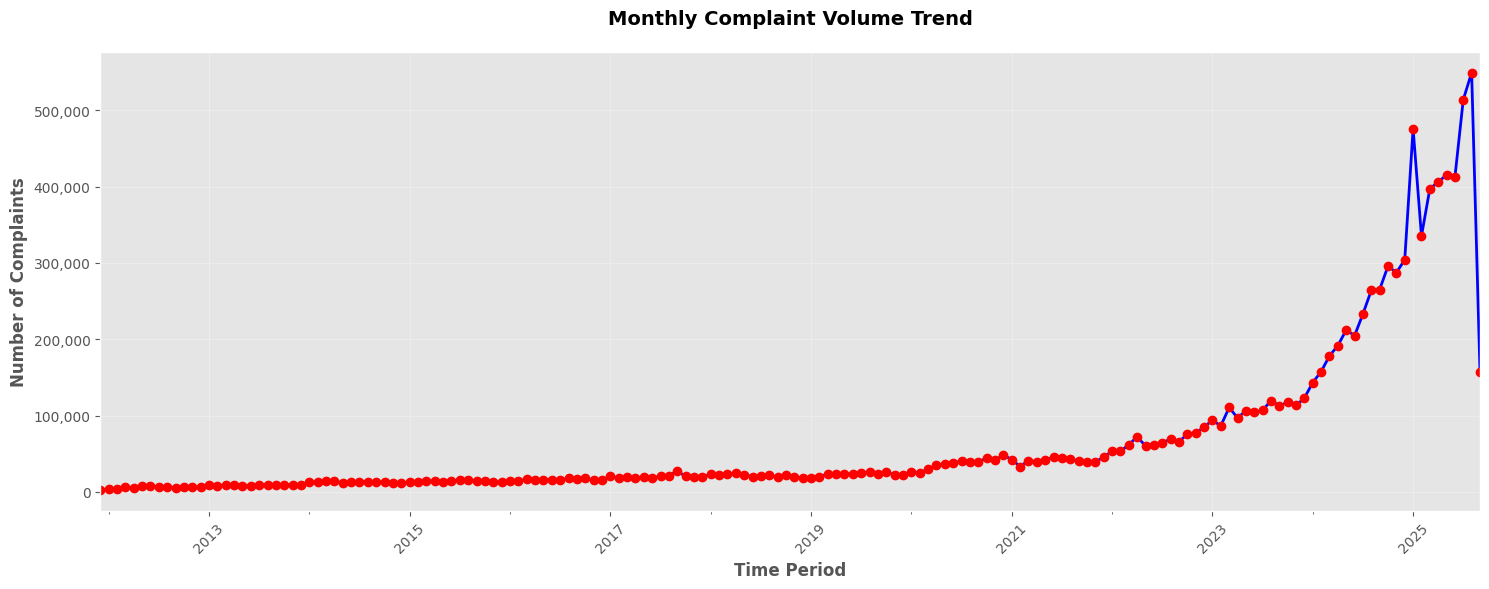

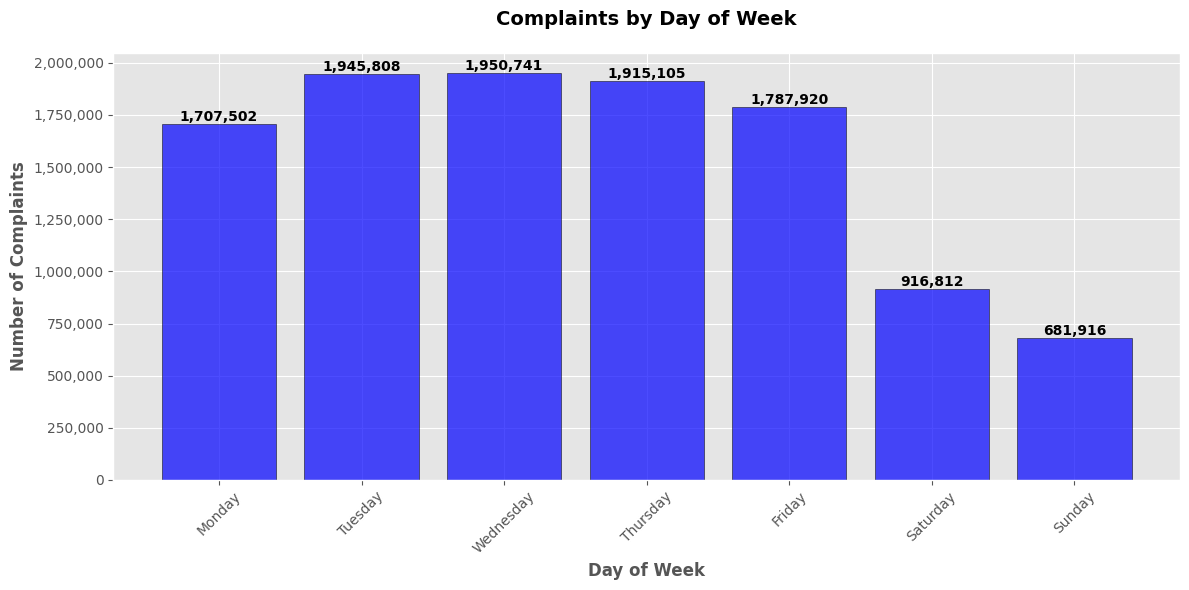


2. PRODUCT CATEGORY ANALYSIS
----------------------------------------


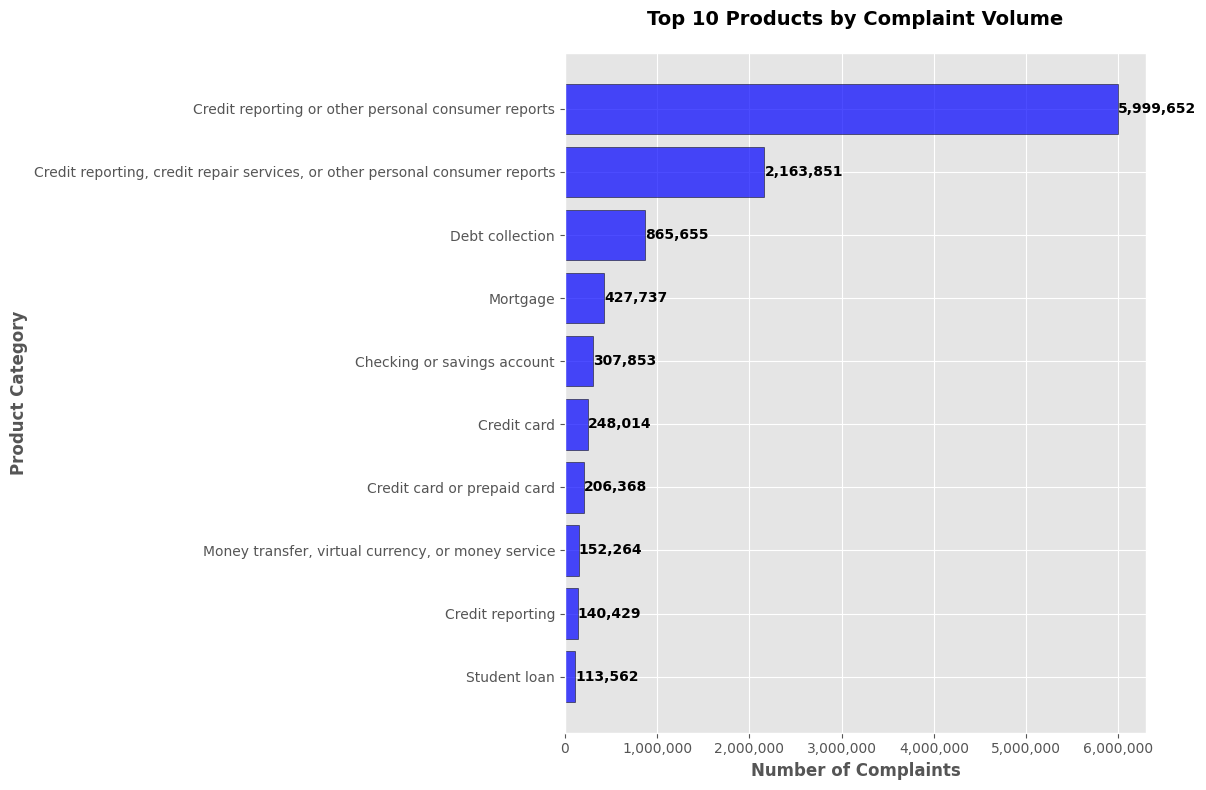

Top 5 Product Categories:
1. Credit reporting or other personal consumer reports: 5,999,652 complaints
2. Credit reporting, credit repair services, or other personal consumer reports: 2,163,851 complaints
3. Debt collection: 865,655 complaints
4. Mortgage: 427,737 complaints
5. Checking or savings account: 307,853 complaints

3. TOP COMPLAINT ISSUES
----------------------------------------


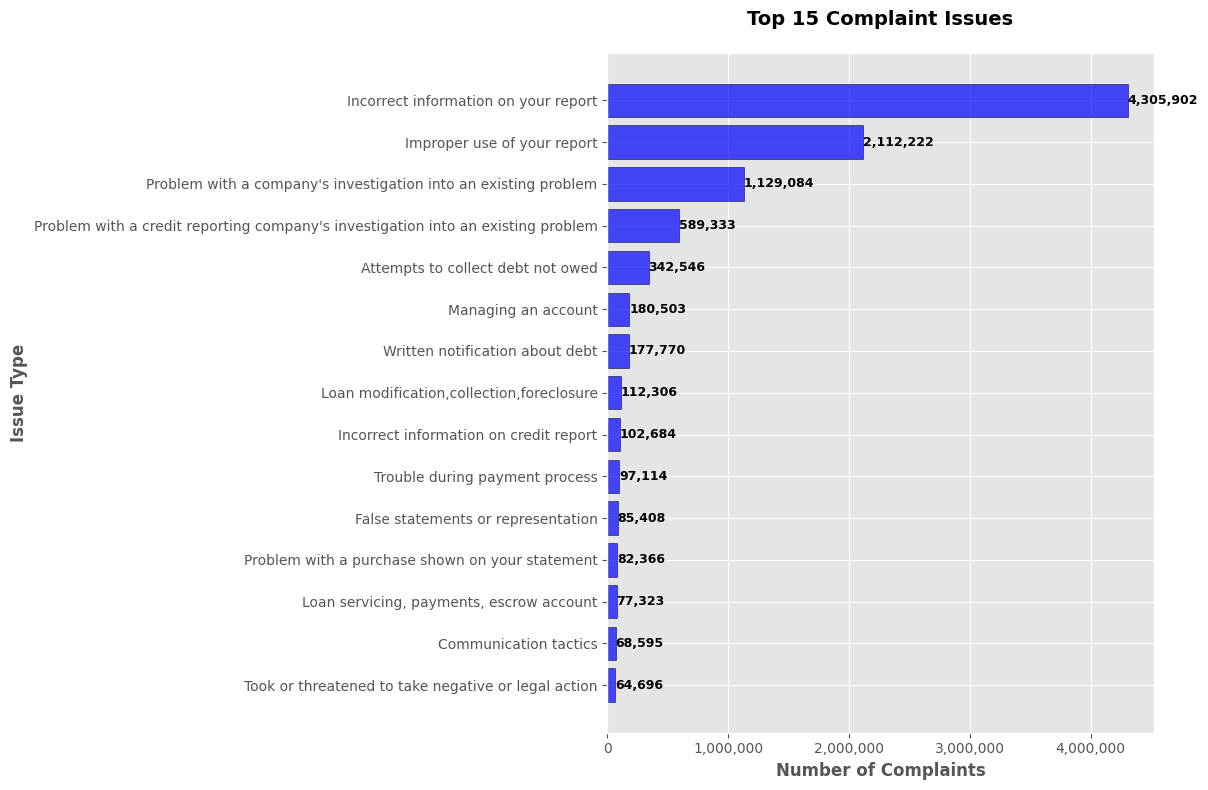


4. COMPANY PERFORMANCE ANALYSIS
----------------------------------------


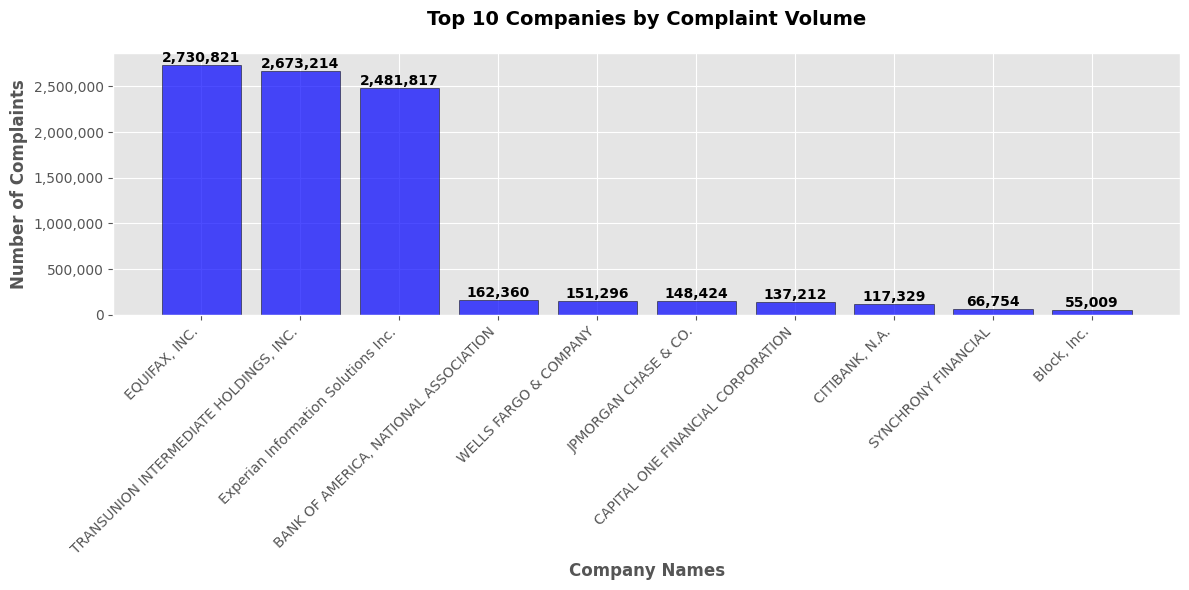


5. GEOGRAPHICAL DISTRIBUTION
----------------------------------------


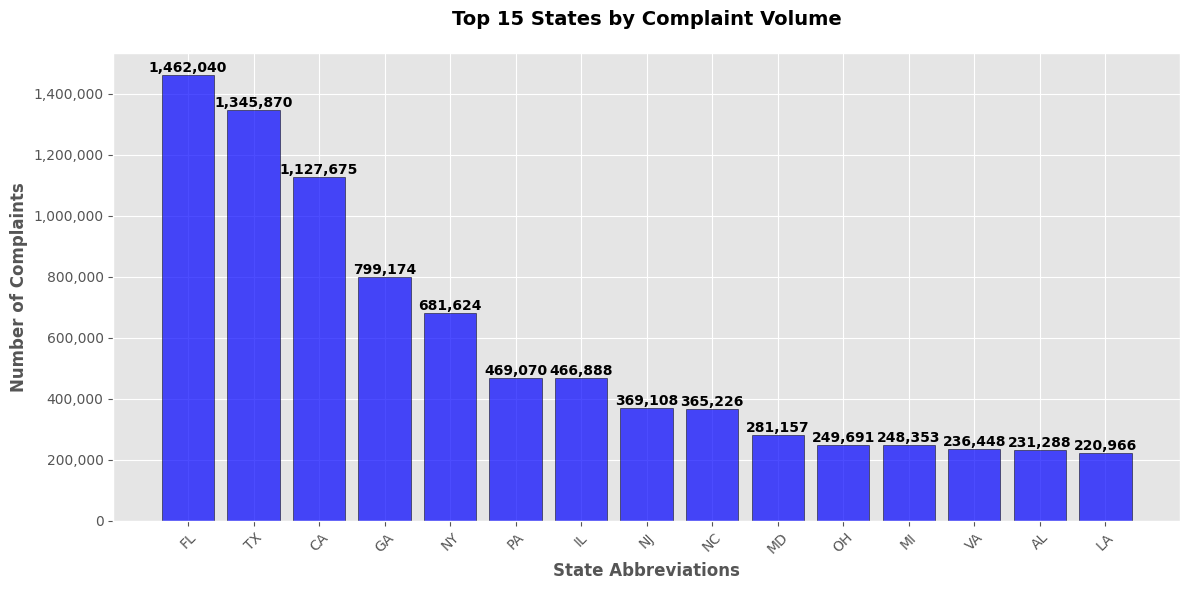


6. COMPANY RESPONSE ANALYSIS
----------------------------------------


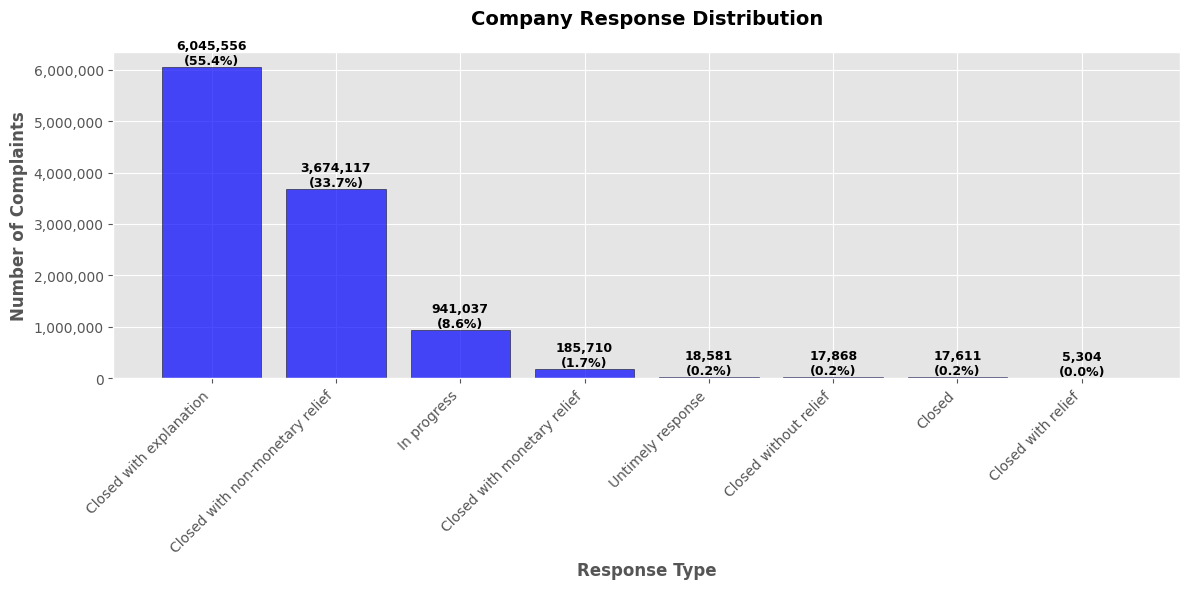

Timely Response Rate: 99.3%

7. COMPLAINT SUBMISSION CHANNELS
----------------------------------------


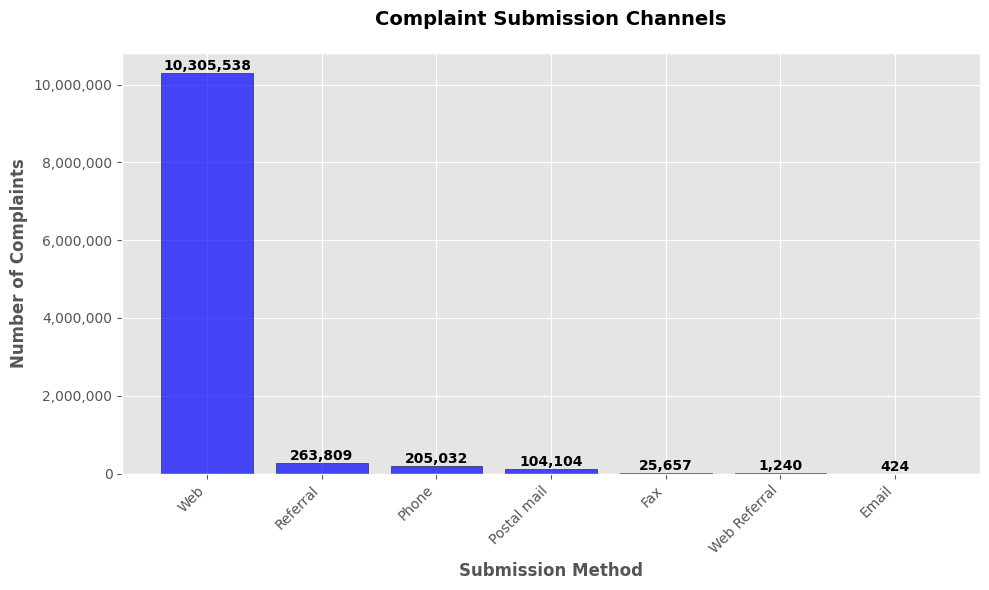


8. RESPONSE TIME ANALYSIS
----------------------------------------
Average response time: 0.8 days
Median response time: 0.0 days
95th percentile response time: 3.0 days


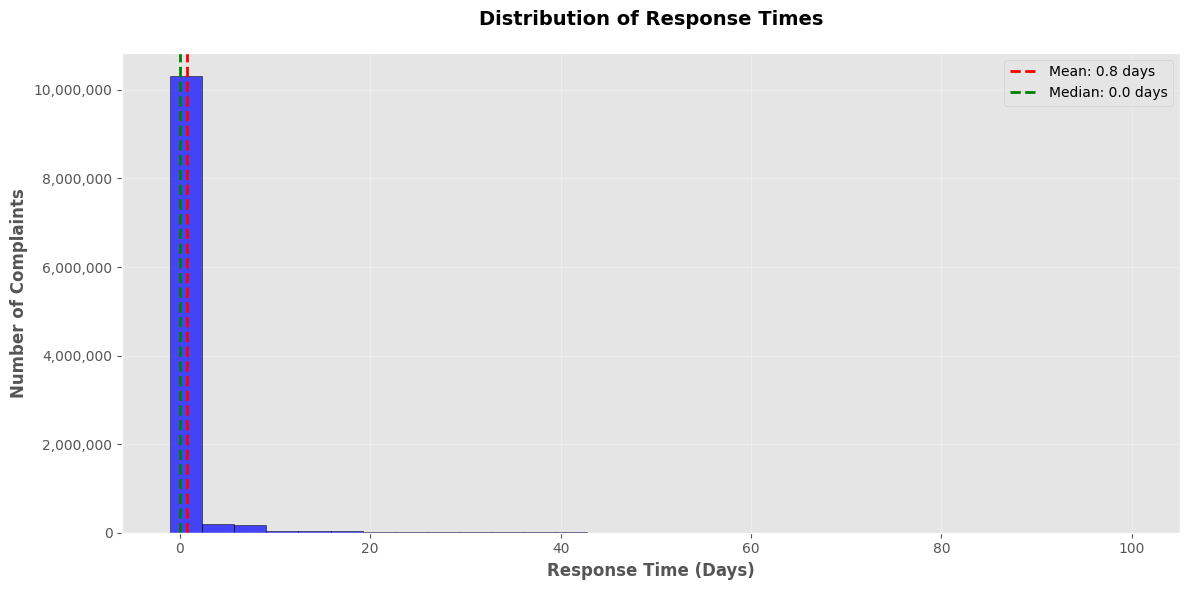


9. PRODUCT-ISSUE RELATIONSHIP
----------------------------------------


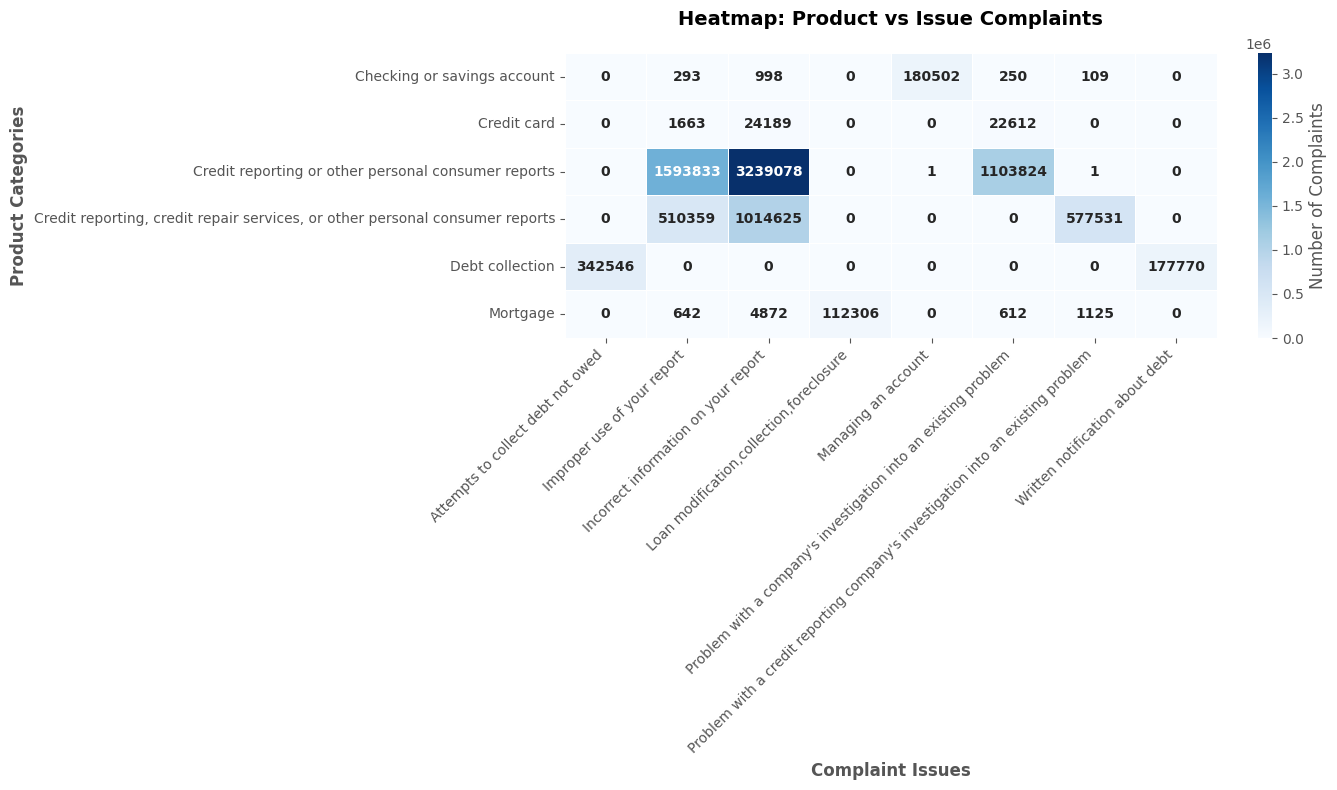


10. CONSUMER DISPUTE RATES
----------------------------------------
Overall Consumer Dispute Rate: 19.3%


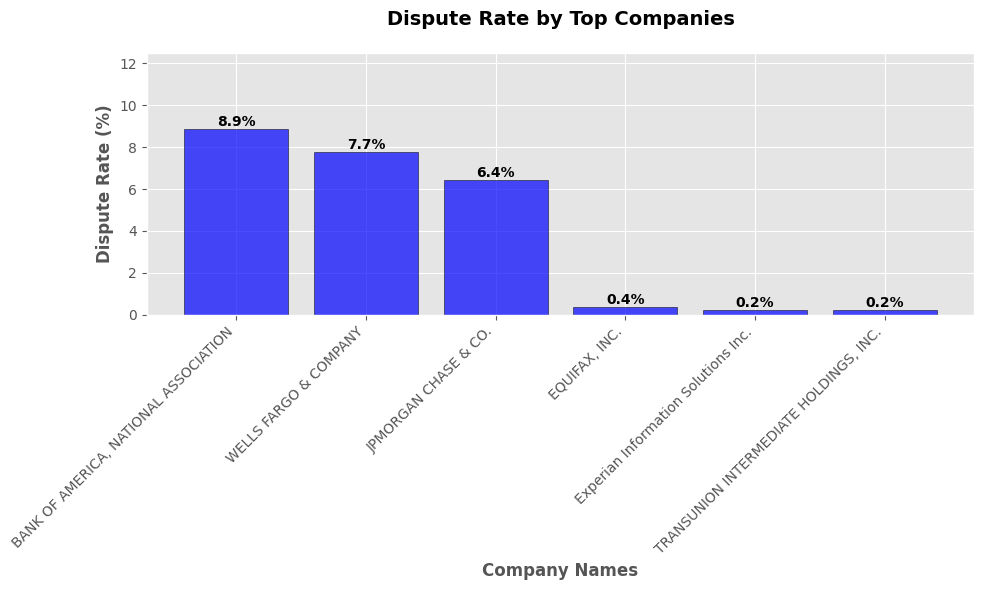


EXECUTIVE SUMMARY & ACTIONABLE INSIGHTS

 KEY FINDINGS:
• Credit reporting companies dominate complaint volumes
• Top issues: Incorrect information, improper use of reports
• California, Florida, and Texas have highest complaint volumes
• Web submission is the primary complaint channel

 RECOMMENDATIONS FOR COMPANIES:
1. ENHANCE DATA ACCURACY: Implement stronger verification processes for credit reporting
2. IMPROVE RESPONSE TIMES: Focus on reducing resolution time for credit report issues
3. PROACTIVE COMMUNICATION: Reach out to consumers before complaints escalate
4. STATE-SPECIFIC STRATEGIES: Develop targeted approaches for high-complaint states
5. DIGITAL EXPERIENCE: Optimize web-based complaint resolution processes

 MONITORING METRICS:
• Monthly complaint trends by product category
• Company response timeliness and quality
• Consumer dispute rates by issue type
• Geographical complaint distribution patterns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Paste the path you copied
file_path = '/content/drive/MyDrive/complaints.csv'

# Read the file
df = pd.read_csv(file_path)

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 6)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nColumns and Data Types:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))

def analyze_cfpb_complaints(df):
    """
    Comprehensive analysis of CFPB consumer complaints data
    """
    print("="*60)
    print("CFPB CONSUMER COMPLAINTS ANALYSIS")
    print("="*60)

    # Convert date columns
    df['Date received'] = pd.to_datetime(df['Date received'])
    df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])
    df['year'] = df['Date received'].dt.year
    df['month'] = df['Date received'].dt.month
    df['day_of_week'] = df['Date received'].dt.day_name()
    df['month_year'] = df['Date received'].dt.to_period('M')

    # 1. COMPLAINT VOLUME TRENDS
    print("\n1. COMPLAINT VOLUME TRENDS OVER TIME")
    print("-"*40)

    # Monthly trend - Blue line with red dots
    monthly_trend = df.groupby('month_year').size()
    plt.figure(figsize=(15, 6))
    monthly_trend.plot(kind='line', marker='o', linewidth=2, markersize=6,
                      color='blue', markerfacecolor='red', markeredgecolor='red',
                      markeredgewidth=1)
    plt.title('Monthly Complaint Volume Trend', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Time Period', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Complaints', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Format y-axis to show full numbers
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.tight_layout()
    plt.show()

    # Daily pattern
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_trend = df['day_of_week'].value_counts().reindex(day_order)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(daily_trend.index, daily_trend.values, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Complaints by Day of Week', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Complaints', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)

    # Format y-axis to show full numbers
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 2. PRODUCT CATEGORY ANALYSIS
    print("\n2. PRODUCT CATEGORY ANALYSIS")
    print("-"*40)

    # Top products
    product_counts = df['Product'].value_counts().head(10)
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(product_counts)), product_counts.values, color='blue', edgecolor='black', alpha=0.7)
    plt.yticks(range(len(product_counts)), product_counts.index)
    plt.title('Top 10 Products by Complaint Volume', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Number of Complaints', fontsize=12, fontweight='bold')
    plt.ylabel('Product Category', fontsize=12, fontweight='bold')
    plt.gca().invert_yaxis()

    # Format x-axis to show full numbers
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2.,
                f'{int(width):,}', ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("Top 5 Product Categories:")
    for i, (product, count) in enumerate(product_counts.head().items(), 1):
        print(f"{i}. {product}: {count:,} complaints")

    # 3. ISSUE ANALYSIS
    print("\n3. TOP COMPLAINT ISSUES")
    print("-"*40)

    issue_counts = df['Issue'].value_counts().head(15)
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(issue_counts)), issue_counts.values, color='blue', edgecolor='black', alpha=0.7)
    plt.yticks(range(len(issue_counts)), issue_counts.index)
    plt.title('Top 15 Complaint Issues', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Number of Complaints', fontsize=12, fontweight='bold')
    plt.ylabel('Issue Type', fontsize=12, fontweight='bold')
    plt.gca().invert_yaxis()

    # Format x-axis to show full numbers
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2.,
                f'{int(width):,}', ha='left', va='center', fontweight='bold', fontsize=9)

    plt.tight_layout()
    plt.show()

    # 4. COMPANY ANALYSIS
    print("\n4. COMPANY PERFORMANCE ANALYSIS")
    print("-"*40)

    # Top companies by complaint volume
    company_counts = df['Company'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(company_counts)), company_counts.values, color='blue', edgecolor='black', alpha=0.7)
    plt.xticks(range(len(company_counts)), company_counts.index, rotation=45, ha='right')
    plt.title('Top 10 Companies by Complaint Volume', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Company Names', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Complaints', fontsize=12, fontweight='bold')

    # Format y-axis to show full numbers
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold', rotation=0)

    plt.tight_layout()
    plt.show()

    # 5. GEOGRAPHICAL ANALYSIS
    print("\n5. GEOGRAPHICAL DISTRIBUTION")
    print("-"*40)

    state_counts = df['State'].value_counts().head(15)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(state_counts)), state_counts.values, color='blue', alpha=0.7, edgecolor='black')
    plt.xticks(range(len(state_counts)), state_counts.index, rotation=45)
    plt.title('Top 15 States by Complaint Volume', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('State Abbreviations', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Complaints', fontsize=12, fontweight='bold')

    # Format y-axis to show full numbers
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 6. COMPANY RESPONSE ANALYSIS
    print("\n6. COMPANY RESPONSE ANALYSIS")
    print("-"*40)

    response_counts = df['Company response to consumer'].value_counts()
    response_percentages = (response_counts / response_counts.sum()) * 100

    # Create a single bar chart for response types (removed pie chart)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(response_counts)), response_counts.values, color='blue', alpha=0.7, edgecolor='black')
    plt.xticks(range(len(response_counts)), response_counts.index, rotation=45, ha='right')
    plt.title('Company Response Distribution', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Response Type', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Complaints', fontsize=12, fontweight='bold')

    # Format y-axis to show full numbers
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add value labels on bars with both count and percentage
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = response_percentages.iloc[i]
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Timely response rate
    timely_rate = df['Timely response?'].value_counts(normalize=True) * 100
    print(f"Timely Response Rate: {timely_rate.get('Yes', 0):.1f}%")

    # 7. SUBMISSION CHANNEL ANALYSIS
    print("\n7. COMPLAINT SUBMISSION CHANNELS")
    print("-"*40)

    submission_counts = df['Submitted via'].value_counts()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(submission_counts)), submission_counts.values, color='blue', alpha=0.7, edgecolor='black')
    plt.xticks(range(len(submission_counts)), submission_counts.index, rotation=45, ha='right')
    plt.title('Complaint Submission Channels', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Submission Method', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Complaints', fontsize=12, fontweight='bold')

    # Format y-axis to show full numbers
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 8. RESPONSE TIME ANALYSIS
    print("\n8. RESPONSE TIME ANALYSIS")
    print("-"*40)

    # Check if we have the necessary date columns and calculate response time
    if pd.notna(df['Date sent to company']).all() and pd.notna(df['Date received']).all():
        df['response_days'] = (df['Date sent to company'] - df['Date received']).dt.days

        # Remove outliers for better visualization (e.g., response times > 100 days)
        response_days_clean = df[df['response_days'] <= 100]['response_days']

        print(f"Average response time: {df['response_days'].mean():.1f} days")
        print(f"Median response time: {df['response_days'].median():.1f} days")
        print(f"95th percentile response time: {df['response_days'].quantile(0.95):.1f} days")

        plt.figure(figsize=(12, 6))
        n, bins, patches = plt.hist(response_days_clean, bins=30, edgecolor='black', alpha=0.7, color='blue')
        plt.title('Distribution of Response Times', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Response Time (Days)', fontsize=12, fontweight='bold')
        plt.ylabel('Number of Complaints', fontsize=12, fontweight='bold')
        plt.grid(True, alpha=0.3)

        # Format y-axis to show full numbers
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

        # Add mean and median lines
        plt.axvline(df['response_days'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["response_days"].mean():.1f} days')
        plt.axvline(df['response_days'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["response_days"].median():.1f} days')
        plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        print("Insufficient date data for response time analysis")

    # 9. PRODUCT-ISSUE HEATMAP
    print("\n9. PRODUCT-ISSUE RELATIONSHIP")
    print("-"*40)

    # Create cross-tabulation of top products and issues
    top_products = df['Product'].value_counts().head(6).index
    top_issues = df['Issue'].value_counts().head(8).index

    filtered_df = df[df['Product'].isin(top_products) & df['Issue'].isin(top_issues)]
    cross_tab = pd.crosstab(filtered_df['Product'], filtered_df['Issue'])

    plt.figure(figsize=(14, 8))
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', linewidths=0.5,
                cbar_kws={'label': 'Number of Complaints'}, annot_kws={'size': 10, 'weight': 'bold'})
    plt.title('Heatmap: Product vs Issue Complaints', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Complaint Issues', fontsize=12, fontweight='bold')
    plt.ylabel('Product Categories', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

    # 10. CONSUMER DISPUTE ANALYSIS
    print("\n10. CONSUMER DISPUTE RATES")
    print("-"*40)

    if 'Consumer disputed?' in df.columns:
        dispute_rate = df['Consumer disputed?'].value_counts(normalize=True) * 100
        print(f"Overall Consumer Dispute Rate: {dispute_rate.get('Yes', 0):.1f}%")

        # Dispute rate by company (for top companies)
        top_companies = df['Company'].value_counts().head(6).index
        dispute_by_company = df[df['Company'].isin(top_companies)]
        dispute_by_company = dispute_by_company.groupby('Company')['Consumer disputed?'].apply(
            lambda x: (x == 'Yes').mean() * 100
        ).sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(len(dispute_by_company)), dispute_by_company.values,
                      color='blue', alpha=0.7, edgecolor='black')
        plt.xticks(range(len(dispute_by_company)), dispute_by_company.index, rotation=45, ha='right')
        plt.title('Dispute Rate by Top Companies', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Company Names', fontsize=12, fontweight='bold')
        plt.ylabel('Dispute Rate (%)', fontsize=12, fontweight='bold')
        plt.ylim(0, 12.5)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

    return df

# Run the analysis
analyzed_df = analyze_cfpb_complaints(df)

# Generate executive summary
print("\n" + "="*70)
print("EXECUTIVE SUMMARY & ACTIONABLE INSIGHTS")
print("="*70)

print("\n KEY FINDINGS:")
print("• Credit reporting companies dominate complaint volumes")
print("• Top issues: Incorrect information, improper use of reports")
print("• California, Florida, and Texas have highest complaint volumes")
print("• Web submission is the primary complaint channel")

print("\n RECOMMENDATIONS FOR COMPANIES:")
print("1. ENHANCE DATA ACCURACY: Implement stronger verification processes for credit reporting")
print("2. IMPROVE RESPONSE TIMES: Focus on reducing resolution time for credit report issues")
print("3. PROACTIVE COMMUNICATION: Reach out to consumers before complaints escalate")
print("4. STATE-SPECIFIC STRATEGIES: Develop targeted approaches for high-complaint states")
print("5. DIGITAL EXPERIENCE: Optimize web-based complaint resolution processes")

print("\n MONITORING METRICS:")
print("• Monthly complaint trends by product category")
print("• Company response timeliness and quality")
print("• Consumer dispute rates by issue type")
print("• Geographical complaint distribution patterns")